In [16]:
!pip install xgboost

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")

## M01AB

In [2]:
cols = ["M01AB","Year","Month","Hour","Weekday Name"]

In [3]:
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [4]:
data.head(10)

,M01AB,Year,Month,Hour,Weekday Name
0,0.00,2014,1,248,Thursday
1,8.00,2014,1,276,Friday
2,2.00,2014,1,276,Saturday
3,4.00,2014,1,276,Sunday
4,5.00,2014,1,276,Monday
5,0.00,2014,1,276,Tuesday
6,5.33,2014,1,276,Wednesday
7,7.00,2014,1,276,Thursday
8,5.00,2014,1,276,Friday
9,5.00,2014,1,276,Saturday


In [5]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [40]:
data.head(10)

,M01AB,Year,Month,Hour,Weekday Name
0,0.00,2014,1,248,4
1,8.00,2014,1,276,0
2,2.00,2014,1,276,2
3,4.00,2014,1,276,3
4,5.00,2014,1,276,1
5,0.00,2014,1,276,5
6,5.33,2014,1,276,6
7,7.00,2014,1,276,4
8,5.00,2014,1,276,0
9,5.00,2014,1,276,2


In [6]:
features = data.drop(['M01AB'],axis=1)
target = data['M01AB']

In [7]:
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]

In [62]:
y_test = np.asarray(y_test)
y_test

array([5.18, 5.  , 7.34, 3.84, 4.  , 7.34, 0.33])

### Linear Regression

In [55]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [56]:
predictions = lr_model.predict(x_test)

In [58]:
predictions

array([ 5.42144422,  5.49572384,  5.64428307,  5.57000345,  5.53286365,
        5.60714326, -8.38339855])

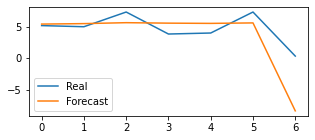

In [67]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [72]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.534486889232185


In [73]:
# Parameters
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 15,num=10)]
max_depth = [int(x) for x in np.linspace(3,10,num=7)]

### Decision Tree Regressor

In [8]:
dt_model = DecisionTreeRegressor(criterion='mse')

In [80]:
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

In [81]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [83]:
predictions = dt_model.predict(x_test)

In [84]:
y_test = np.asarray(y_test)

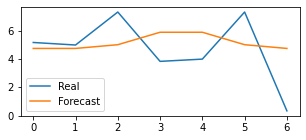

In [85]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [86]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.3447226898765567


### Random Forest

In [28]:
rf = RandomForestRegressor(random_state = 1)

In [32]:
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

In [33]:
model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)

In [35]:
model.best_params_

{'max_depth': 5, 'n_estimators': 12}

In [36]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 12)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=12, random_state=1)

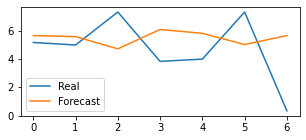

In [37]:
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [38]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.6645734212803887


### XGBoost

In [18]:
data_dmatrix = xgb.DMatrix(data=features,label = target)

In [19]:
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]

In [53]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')

In [69]:
parameters = {
    'n_estimators' : [8,9,10,11,12],
    'max_depth' : max_depth,
    'colsample_bytree': [0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}

In [70]:
model = GridSearchCV(xg, param_grid=parameters)

In [71]:
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.25,
 'max_depth': 5,
 'n_estimators': 12}

In [72]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 5,colsample_bytree= 0.5,learning_rate=0.25)
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=12, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

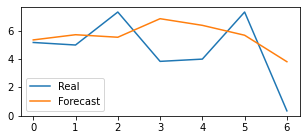

In [73]:
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [74]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.188578795538128


## M01AE

In [3]:
cols = ["M01AE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [4]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [5]:
features = data.drop(['M01AE'],axis=1)
target = data['M01AE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

In [7]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)

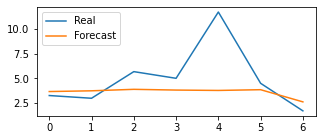

In [8]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [9]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print("LR :" ,rmse)

LR : 3.139314680825643


In [10]:
n_estimators = [int(x) for x in np.linspace(start = 5,stop = 15,num=10)]
max_depth = [int(x) for x in np.linspace(5,10,num=5)]

In [13]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

In [14]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)

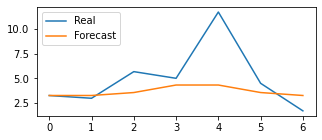

In [15]:
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [16]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

2.984566114686665


In [18]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5, 'n_estimators': 15}

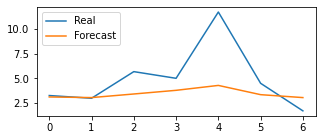

In [19]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [20]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.0323732653031454


In [22]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : [8,9,10,11,12],
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 7,
 'n_estimators': 12}

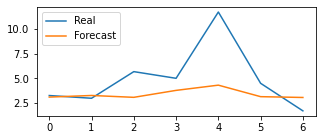

In [23]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 7,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [24]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

3.0758875800389207


## N02BA

In [25]:
cols = ["N02BA","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [26]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)

In [27]:
features = data.drop(['N02BA'],axis=1)
target = data['N02BA']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

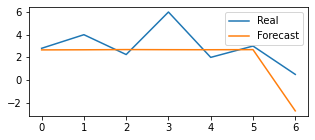

In [29]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [30]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.8484661396542543


In [31]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

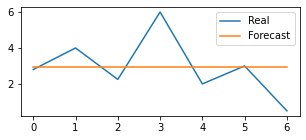

In [32]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [33]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.5958334304524013


In [34]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5, 'n_estimators': 15}

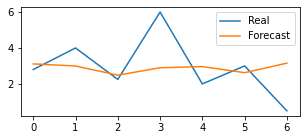

In [35]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 15)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [36]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.643248582288139


In [37]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.3,
 'max_depth': 5,
 'n_estimators': 15}

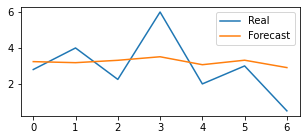

In [38]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 5,colsample_bytree= 0.3,learning_rate=0.3)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [39]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.4751374293167943


## N02BE

In [40]:
cols = ["N02BE","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [41]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N02BE'],axis=1)
target = data['N02BE']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

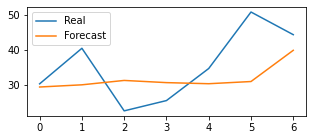

In [42]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [43]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

9.63596824889825


In [46]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : [2,3,4,5]
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 4}

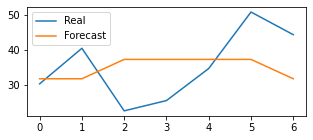

In [47]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=4)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [48]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

10.603633158686316


In [49]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5, 'n_estimators': 12}

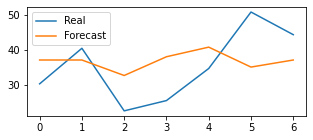

In [50]:
rf = RandomForestRegressor(random_state = 1,max_depth = 5,n_estimators = 12)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [51]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

9.699951799052188


In [52]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.15,
 'max_depth': 6,
 'n_estimators': 15}

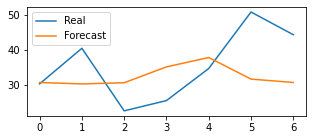

In [53]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 6,colsample_bytree= 0.5,learning_rate=0.15)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [54]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

10.89609338337581


## N05B

In [55]:
cols = ["N05B","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [56]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N05B'],axis=1)
target = data['N05B']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

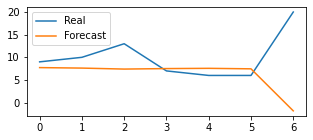

In [57]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [58]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

8.614186843476014


In [60]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 5}

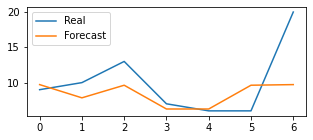

In [61]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=5)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [62]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.40785352060915


In [63]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 6, 'n_estimators': 7}

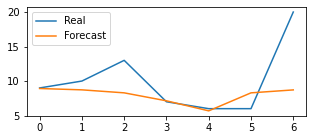

In [64]:
rf = RandomForestRegressor(random_state = 1,max_depth = 6,n_estimators = 7)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [65]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.7276767697551705


In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

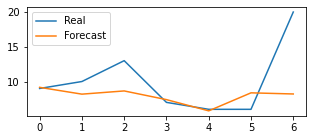

In [67]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 12,max_depth = 5,colsample_bytree= 0.5,learning_rate=0.2)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [68]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.886768474834329


## N05C

In [69]:
cols = ["N05C","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)

In [70]:
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['N05C'],axis=1)
target = data['N05C']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

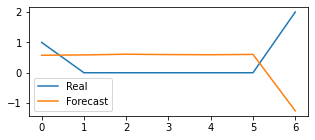

In [71]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [72]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.3399310207888249


In [74]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 10}

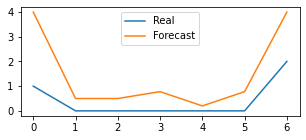

In [75]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=10)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [76]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.4515940274259032


In [77]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 6, 'n_estimators': 13}

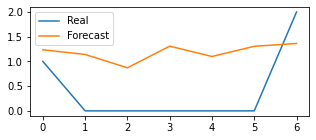

In [78]:
rf = RandomForestRegressor(random_state = 1,max_depth = 6,n_estimators = 13)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [79]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

1.0108052177928037


In [80]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 13}

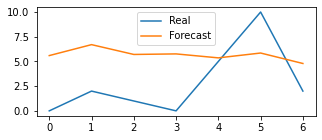

In [82]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 13,max_depth = 8,colsample_bytree= 0.5,learning_rate=0.1)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [83]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

4.37307487039575


## R03

In [84]:
cols = ["R03","Year","Month","Hour","Weekday Name"]
data = pd.read_csv('pharma/salesdaily.csv',usecols=cols)
enc = LabelEncoder()
data.loc[:,['Weekday Name']] = data.loc[:,['Weekday Name']].apply(enc.fit_transform)
features = data.drop(['R03'],axis=1)
target = data['R03']
x_train = features[:-7]
y_train = target[:-7]
x_test = features[-7:]
y_test = target[-7:]
y_test = np.asarray(y_test)

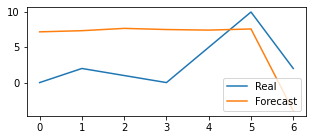

In [85]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [86]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

5.7242342416927645


In [87]:
dt_model = DecisionTreeRegressor(criterion='mse')
parameters = {
    'max_depth' : max_depth
}
model = GridSearchCV(dt_model, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 3}

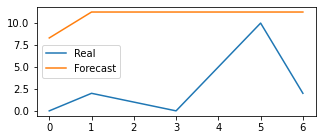

In [88]:
dt_model = DecisionTreeRegressor(criterion='mse',max_depth=3)
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [89]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

8.565555515128933


In [90]:
rf = RandomForestRegressor(random_state = 1)
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
    
}

model = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_absolute_error', cv=10)
model.fit(x_train,y_train)
model.best_params_

{'max_depth': 4, 'n_estimators': 6}

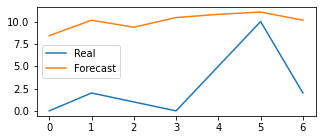

In [91]:
rf = RandomForestRegressor(random_state = 1,max_depth = 4,n_estimators = 6)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [92]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

7.7240180352905785


In [93]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'colsample_bytree': [0.3,0.5, 0.7],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ]
    
}
model = GridSearchCV(xg, param_grid=parameters,cv=10)
model.fit(x_train,y_train)
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.15,
 'max_depth': 3,
 'n_estimators': 15}

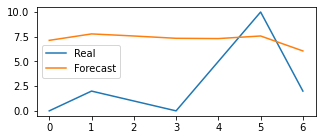

In [94]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror',n_estimators = 15,max_depth = 3,colsample_bytree= 0.5,learning_rate=0.15)
xg.fit(x_train,y_train)
predictions = xg.predict(x_test)
y_test = np.asarray(y_test)
fig = plt.figure(figsize=(5,2))
plt.plot(y_test,label='Real')
plt.plot(predictions,label='Forecast')
plt.legend()

In [95]:
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print(rmse)

5.467152047172006
